<a href="https://colab.research.google.com/github/jiminAn/2022_WINTER_SAMSUNG_DL/blob/main/Day_4_2_RNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reccurent Nerual Network, RNN

In [ ]:
import torch
import numpy as np

In [ ]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

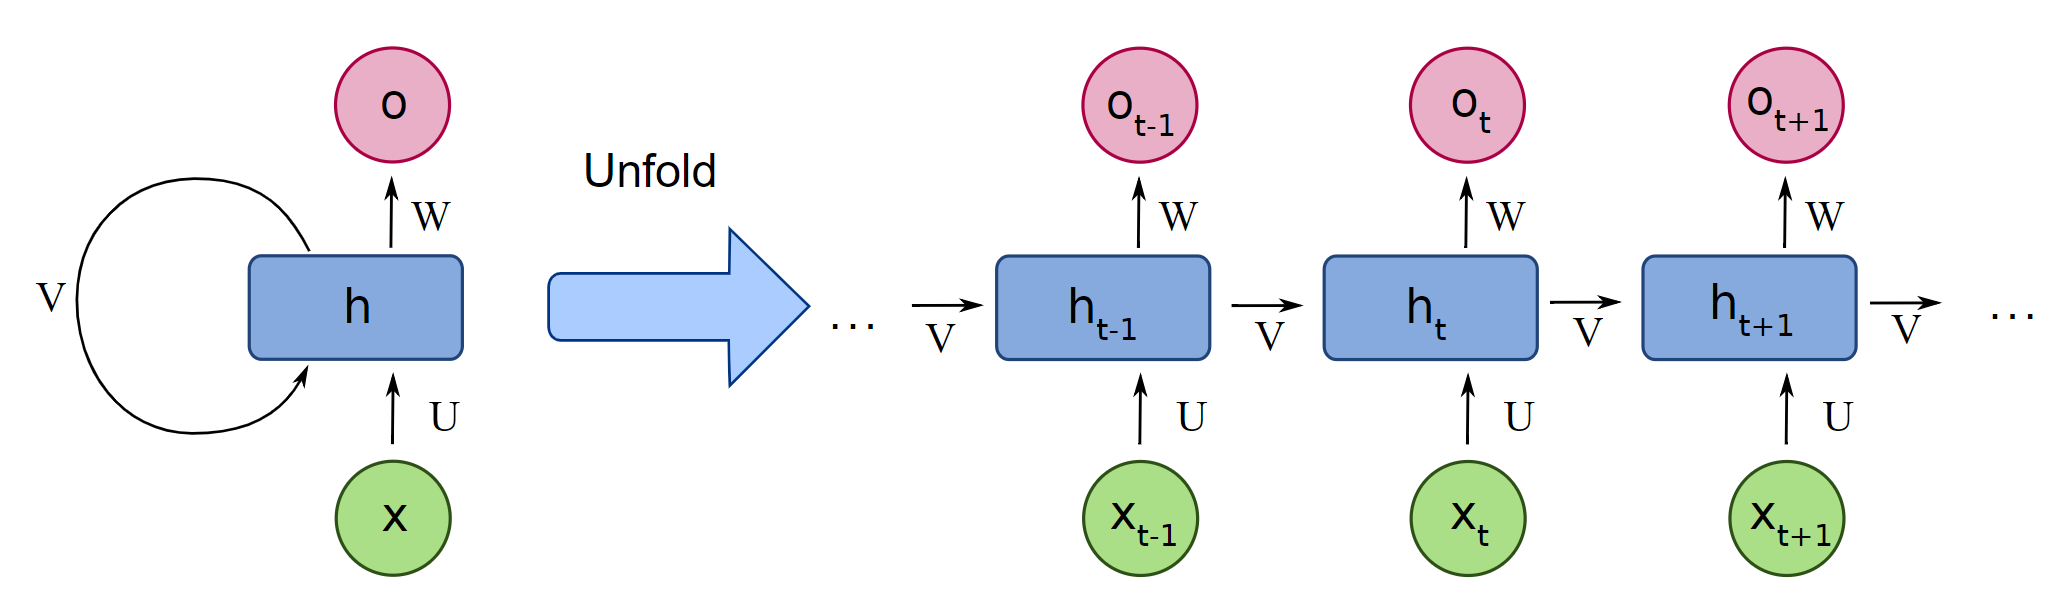

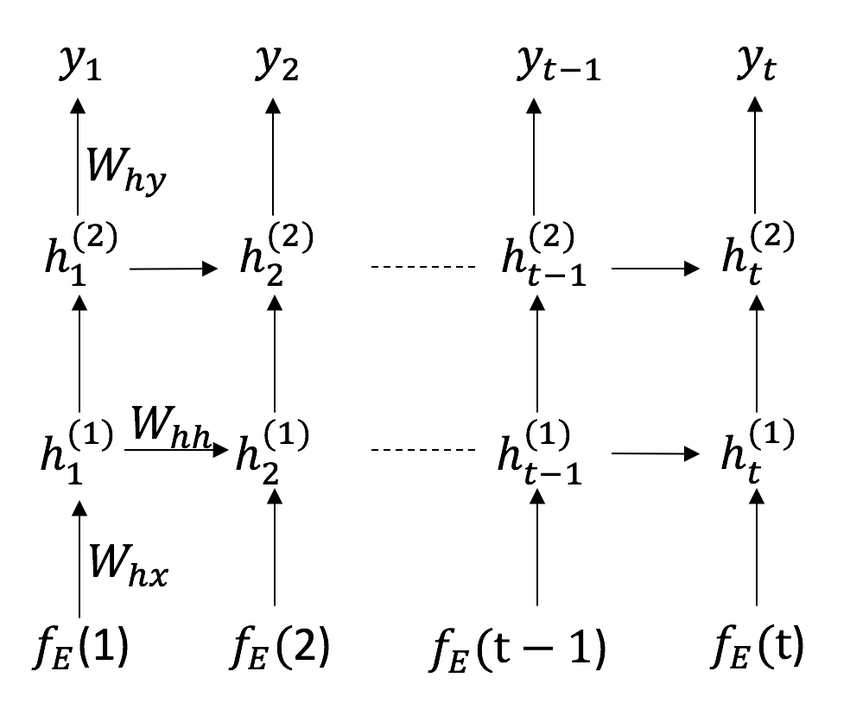

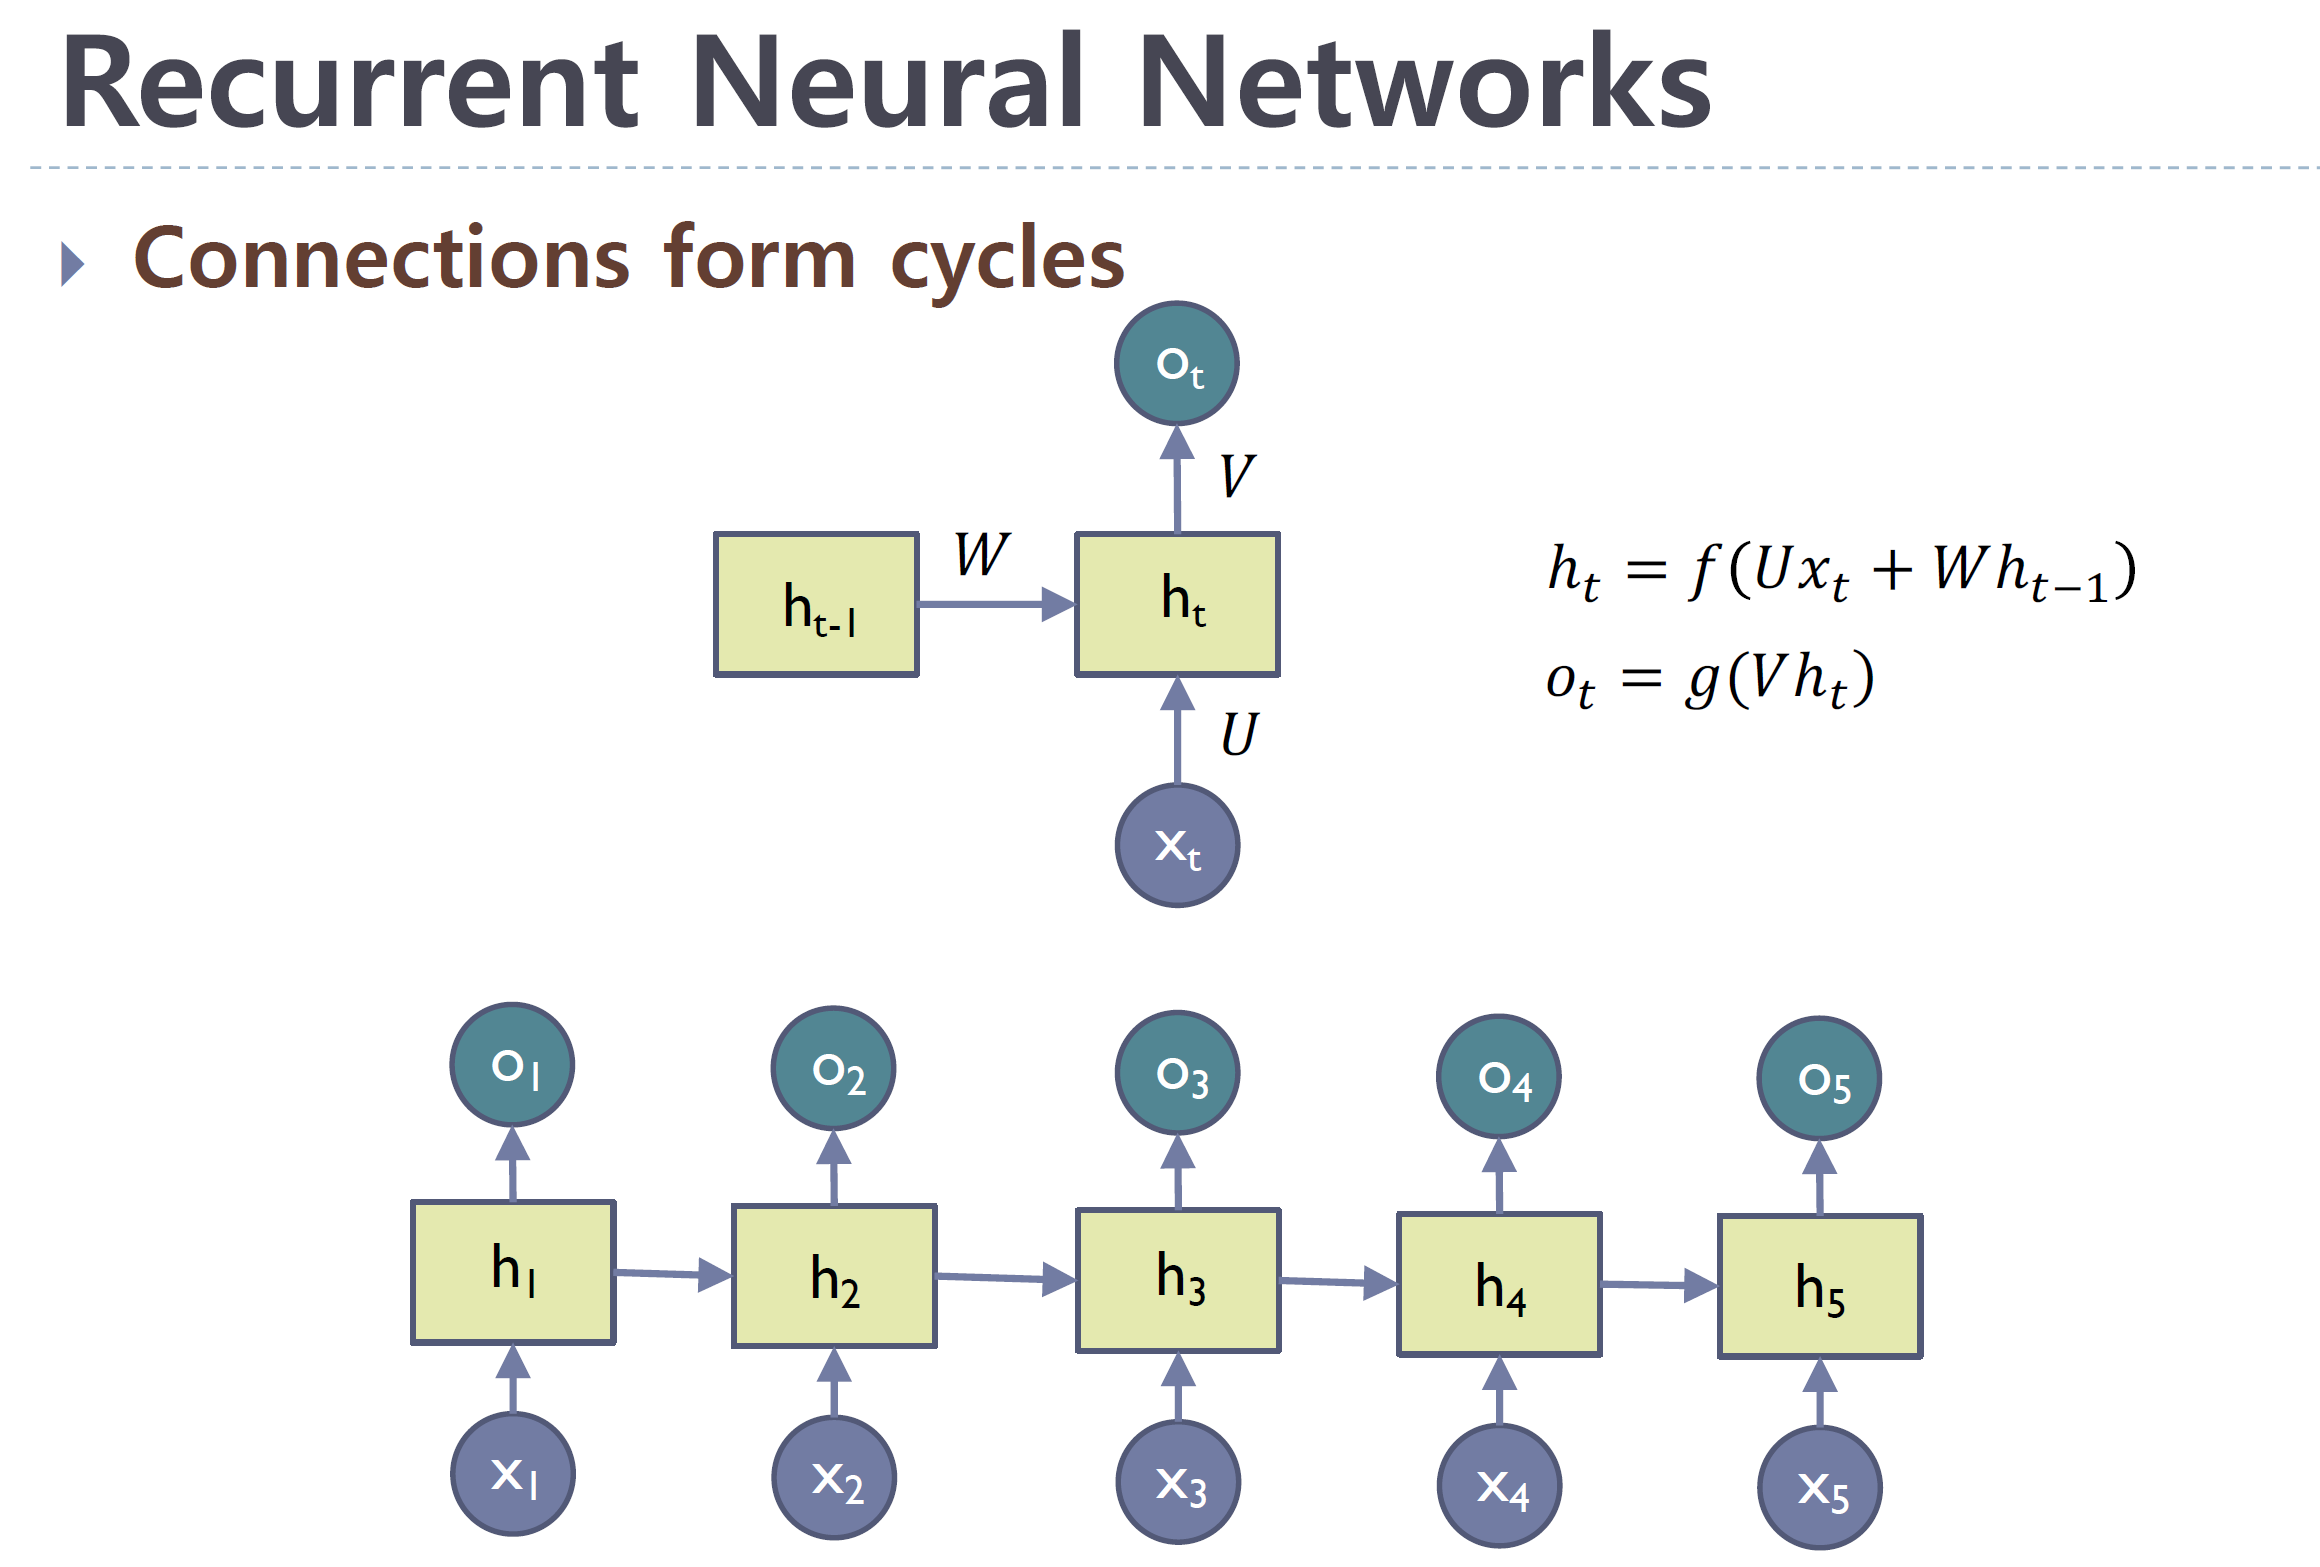

# 1. RNN 모델의 입력 데이터 형태

In [ ]:
# singleton example
# shape : (1, 1, 4)
# input_data_np = np.array([[[1, 0, 0, 0]]])

# sequential example
# shape : (3, 5, 4)
# (batch size, seq length, input_size)
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]
input_data_np = np.array([[h, e, l, l, o], 
                          [e, o, l, l, l], 
                          [l, l, e, e, l]], dtype=np.float32)  # (3, 5, 4)

In [ ]:
# transform as torch tensor
input_data = torch.Tensor(input_data_np)

# 2. RNN 모델 정의

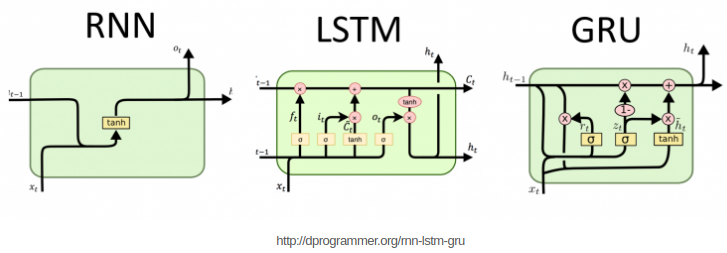

In [ ]:
# declare dimension
input_size = 4
hidden_size = 3
# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)  # 처음에 batch_size or seq_length

In [ ]:
input_data.shape

torch.Size([3, 5, 4])

In [ ]:
# check output
outputs, _status = rnn(input_data)
# inputs: input, h_0 = 0 (num_layers*num_directions, batch, hidden_size)
print("outputs:\n", outputs)
print(outputs.size())
print()
# shape : (3, 5, 2)
# (batch size, seq length, hidden_size)

print("hidden states:\n", _status)
print(_status.size())

outputs:
 tensor([[[ 0.3645, -0.2730,  0.7180],
         [ 0.4041,  0.2834,  0.8288],
         [-0.5492,  0.2833,  0.6198],
         [-0.0417,  0.1959,  0.7834],
         [-0.2700,  0.6140,  0.7499]],

        [[ 0.6019,  0.0968,  0.8032],
         [-0.5361,  0.6127,  0.6351],
         [-0.1767,  0.2722,  0.7484],
         [-0.2669,  0.2435,  0.7343],
         [-0.2064,  0.2308,  0.7520]],

        [[-0.0886, -0.0691,  0.6529],
         [-0.1674,  0.1385,  0.7484],
         [ 0.5060,  0.3665,  0.8605],
         [ 0.0719,  0.4539,  0.7607],
         [-0.4487,  0.2909,  0.6627]]], grad_fn=<TransposeBackward1>)
torch.Size([3, 5, 3])

hidden states:
 tensor([[[-0.2700,  0.6140,  0.7499],
         [-0.2064,  0.2308,  0.7520],
         [-0.4487,  0.2909,  0.6627]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 3])


In [ ]:
[(name, param.shape) for name, param in rnn.named_parameters()]

[('weight_ih_l0', torch.Size([3, 4])),
 ('weight_hh_l0', torch.Size([3, 3])),
 ('bias_ih_l0', torch.Size([3])),
 ('bias_hh_l0', torch.Size([3]))]

In [ ]:
lstm = torch.nn.LSTM(input_size, hidden_size, batch_first=True)
outputs, _status = lstm(input_data)
print(outputs)
print(outputs.size())
print()

print(_status[0])
print(_status[0].shape)

tensor([[[ 0.0332, -0.0767, -0.0075],
         [-0.0296, -0.0102,  0.1124],
         [-0.1096, -0.0728,  0.2433],
         [-0.1462, -0.0925,  0.2878],
         [-0.1237, -0.0601,  0.1683]],

        [[-0.0651,  0.0088,  0.1280],
         [-0.0644, -0.0335,  0.0715],
         [-0.1249, -0.0859,  0.2192],
         [-0.1514, -0.0967,  0.2755],
         [-0.1650, -0.1000,  0.3003]],

        [[-0.0951, -0.0677,  0.1903],
         [-0.1383, -0.0908,  0.2647],
         [-0.1672, -0.0299,  0.2082],
         [-0.1742, -0.0155,  0.2040],
         [-0.1688, -0.0785,  0.2918]]], grad_fn=<TransposeBackward0>)
torch.Size([3, 5, 3])

tensor([[[-0.1237, -0.0601,  0.1683],
         [-0.1650, -0.1000,  0.3003],
         [-0.1688, -0.0785,  0.2918]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 3])


In [ ]:
[(name, param.shape) for name, param in lstm.named_parameters()]

[('weight_ih_l0', torch.Size([12, 4])),
 ('weight_hh_l0', torch.Size([12, 3])),
 ('bias_ih_l0', torch.Size([12])),
 ('bias_hh_l0', torch.Size([12]))]

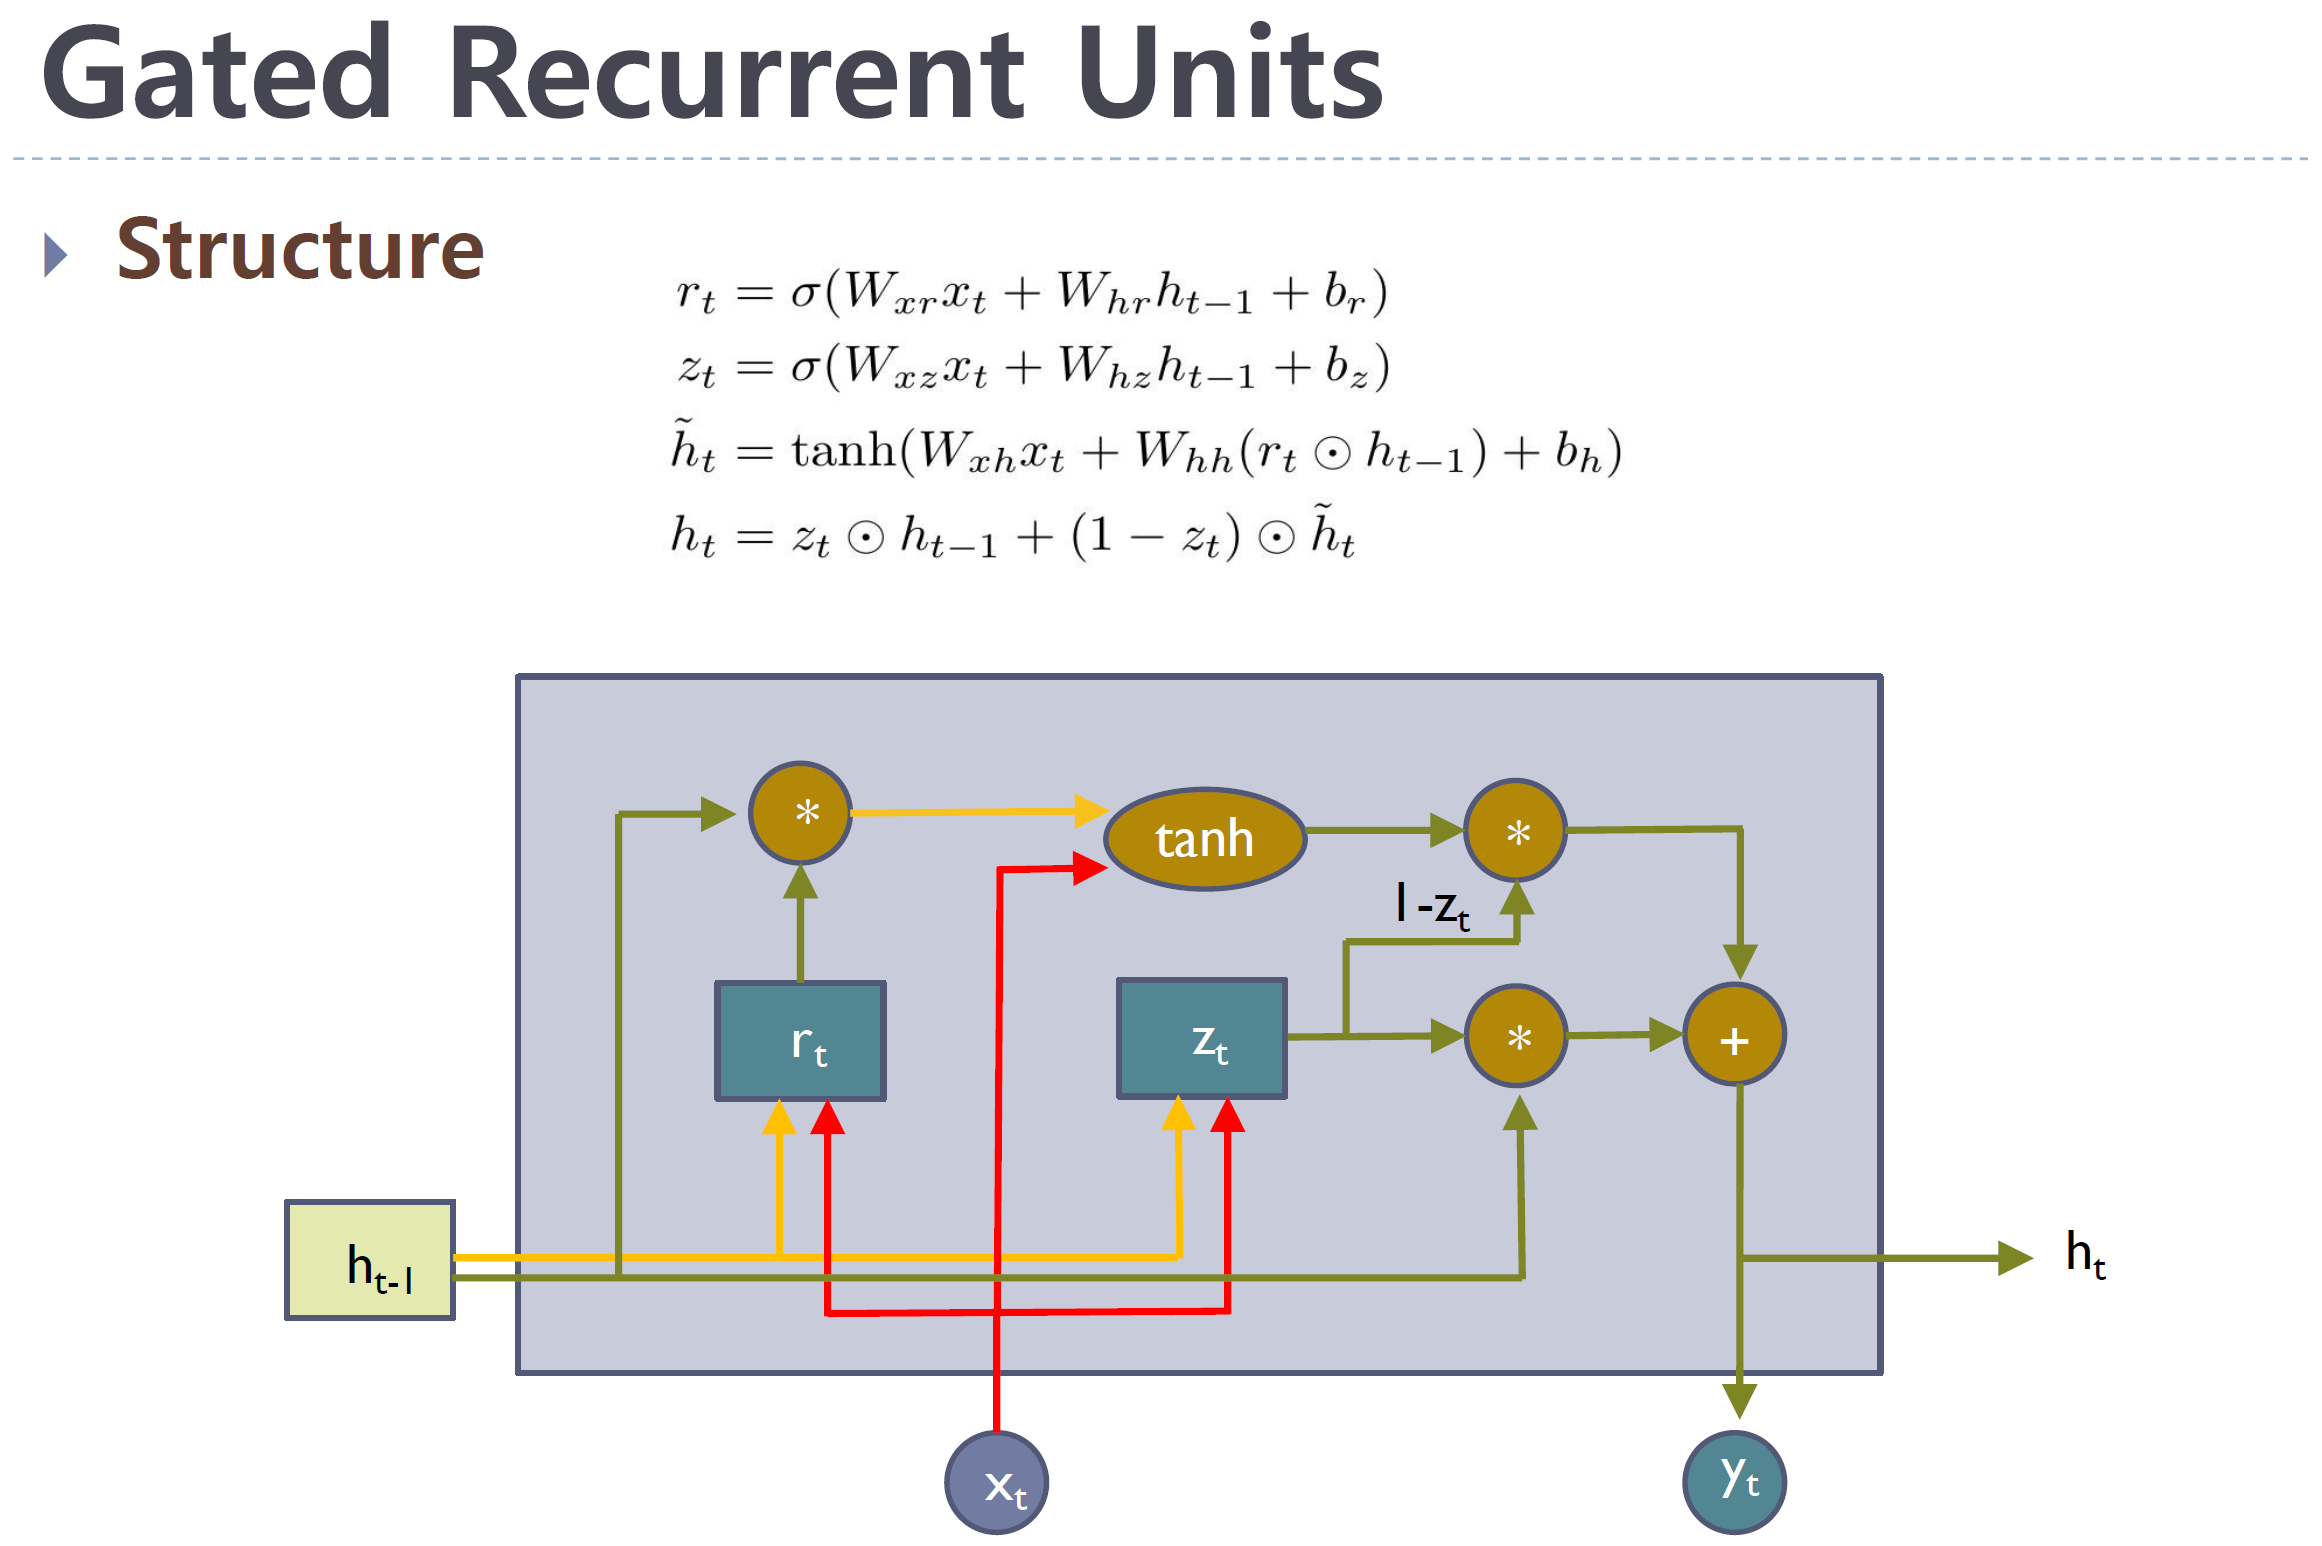

In [ ]:
gru = torch.nn.GRU(input_size, hidden_size, batch_first=True)
outputs, _status = gru(input_data)
print(outputs)
print(outputs.size())
print()

print(_status)
print(_status.size())

tensor([[[-0.2310, -0.0714,  0.0338],
         [-0.3663,  0.2120, -0.2618],
         [-0.4574,  0.3943, -0.2265],
         [-0.4844,  0.4812, -0.2220],
         [-0.6343,  0.4097,  0.0853]],

        [[-0.2283,  0.1992, -0.2961],
         [-0.5359,  0.2500,  0.0486],
         [-0.5157,  0.3926, -0.0920],
         [-0.5025,  0.4714, -0.1619],
         [-0.4935,  0.5139, -0.1998]],

        [[-0.2468,  0.2164, -0.1436],
         [-0.3813,  0.3635, -0.1925],
         [-0.4400,  0.4248, -0.3875],
         [-0.4857,  0.4878, -0.4918],
         [-0.5154,  0.5580, -0.3459]]], grad_fn=<TransposeBackward1>)
torch.Size([3, 5, 3])

tensor([[[-0.6343,  0.4097,  0.0853],
         [-0.4935,  0.5139, -0.1998],
         [-0.5154,  0.5580, -0.3459]]], grad_fn=<StackBackward0>)
torch.Size([1, 3, 3])


In [ ]:
[(name, param.shape) for name, param in gru.named_parameters()]

[('weight_ih_l0', torch.Size([9, 4])),
 ('weight_hh_l0', torch.Size([9, 3])),
 ('bias_ih_l0', torch.Size([9])),
 ('bias_hh_l0', torch.Size([9]))]

## Exercise. Apply RNN to image classification.

In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.MNIST(root='./mnist', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./mnist', train=False, transform=transform)

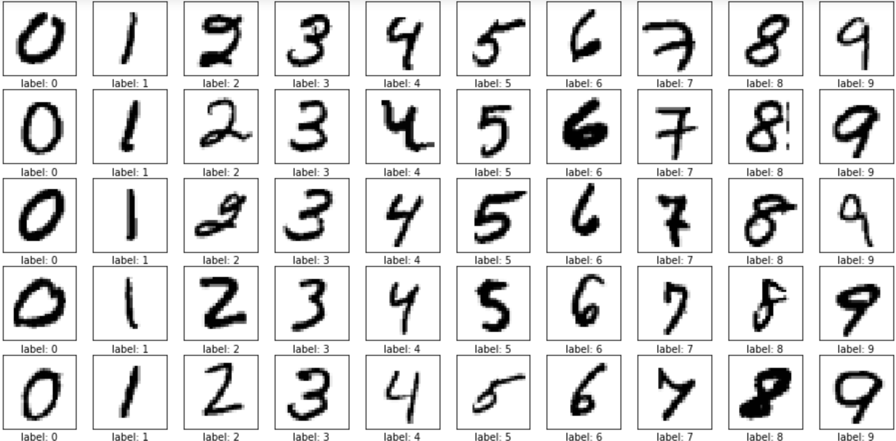

In [ ]:
from multiprocessing import cpu_count

In [ ]:
num_workers = int(cpu_count() / 2)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [ ]:
class ImageRNN(torch.nn.Module):
    def __init__(self, batch_size, seq_length, input_size, hidden_size, num_classes, device):
        super(ImageRNN, self).__init__()
        self.batch_size = batch_size
        self.seq_length = seq_length
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes

        # make rnn
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True, nonlinearity='tanh')
        # make fully-connected
        self.fc = torch.nn.Linear(seq_length*hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, self.seq_length, self.input_size)
        x, hidden = self.rnn(x)
        x = x.reshape(-1, (self.seq_length * self.hidden_size))
        out = self.fc(x)

        return out


- Practice 1. Image를 RNN 모델의 input으로 할 때, 파라미터를 정의하시오.

In [ ]:
# parameters
seq_length = ? # not sequential data
input_size = ? # mnist --> one channel, 28 by 28
hidden_size = 30
num_classes = ? # number of class
epochs = 5

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
import torch.optim as optim

In [ ]:
from torch import nn

In [ ]:
model = ImageRNN(batch_size, seq_length, input_size, hidden_size, num_classes, device).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# %%time

for epoch in range(epochs):
    # Train
    model.train()
    
    train_loss = 0
    train_correct = 0
    
    for x, y in trainloader:
        optimizer.zero_grad()

        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        loss = criterion(outputs, y)
                
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        train_correct += predicted.eq(y).sum().item()
        
    train_loss = train_loss / len(trainloader)
    train_acc = train_correct / len(trainset)
        
    print('[%2d] TRAIN loss: %.3f, acc: %.3f' % (epoch+1, train_loss, train_acc))

[ 1] TRAIN loss: 0.535, acc: 0.866
[ 2] TRAIN loss: 0.241, acc: 0.932
[ 3] TRAIN loss: 0.193, acc: 0.944
[ 4] TRAIN loss: 0.166, acc: 0.952
[ 5] TRAIN loss: 0.147, acc: 0.957
[ 6] TRAIN loss: 0.133, acc: 0.961
[ 7] TRAIN loss: 0.121, acc: 0.965
[ 8] TRAIN loss: 0.112, acc: 0.967
[ 9] TRAIN loss: 0.105, acc: 0.970
[10] TRAIN loss: 0.098, acc: 0.972


In [ ]:
# Test
model.eval()

test_loss = 0
test_correct = 0
test_preds = []

with torch.no_grad():
    for i, (x, y) in enumerate(testloader):
        x = x.view(-1, 28, 28)
        
        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        loss = criterion(outputs, y)
        
        test_loss += loss.item()
        _, predicted = outputs.max(1)
        test_correct += predicted.eq(y).sum().item()
        
        if i == 0:
            test_preds = predicted
        else:
            test_preds = torch.cat((test_preds, predicted), dim=0)
            
test_preds = test_preds.cpu()

print('TEST loss: %.4f, acc: %.4f' % (test_loss/len(testloader), test_correct/len(testset)))

TEST loss: 0.1329, acc: 0.9587


In [ ]:
print(test_preds[:20])

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4])


In [ ]:
print(testset.targets[:20])

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])
